### 0. Import Opencv and numpy

In [0]:
import numpy as np
import cv2 as cv # OpenCV library
from google.colab.patches import cv2_imshow # colab-specific function 

### 1. Load image

In [0]:
img = cv.imread('nobg_plastic.jpg')
acril = cv.resize(img,(600, 800))

### 2. Change colors (gray)

In [0]:
img_gray = cv.cvtColor(acril, cv.COLOR_BGR2GRAY)

### 3. Smooth (if required)

In [0]:
kernel_size = 3
ddepth = -1
kernel = np.ones((kernel_size, kernel_size), dtype=np.float32) 
kernel /= (kernel_size * kernel_size)
img_gray_sm = cv.filter2D(img_gray, ddepth, kernel)

### 4. Canny edges

In [0]:
low_threshold = 40
ratio = 3
detected_edges = cv.Canny(img_gray_sm, low_threshold, low_threshold*ratio, kernel_size)

### 5. Morphological operations: diliaton, erosion ...

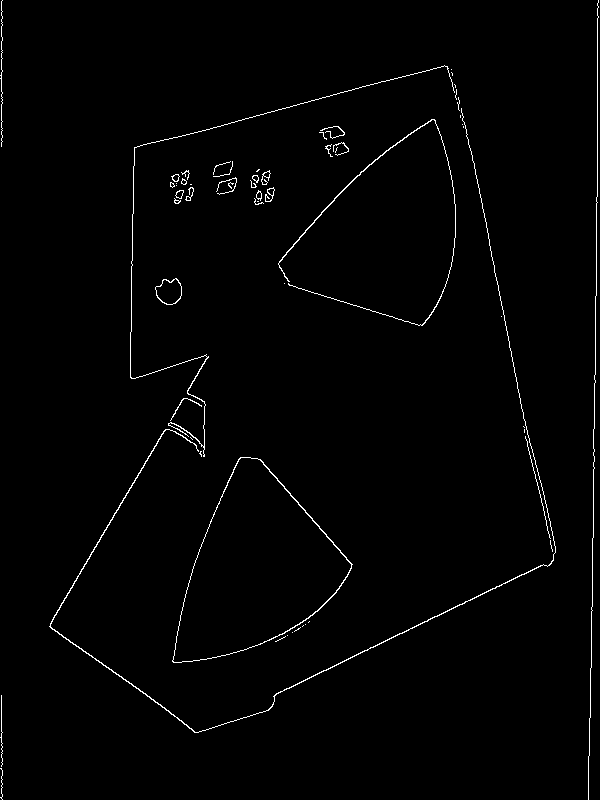

RGB image


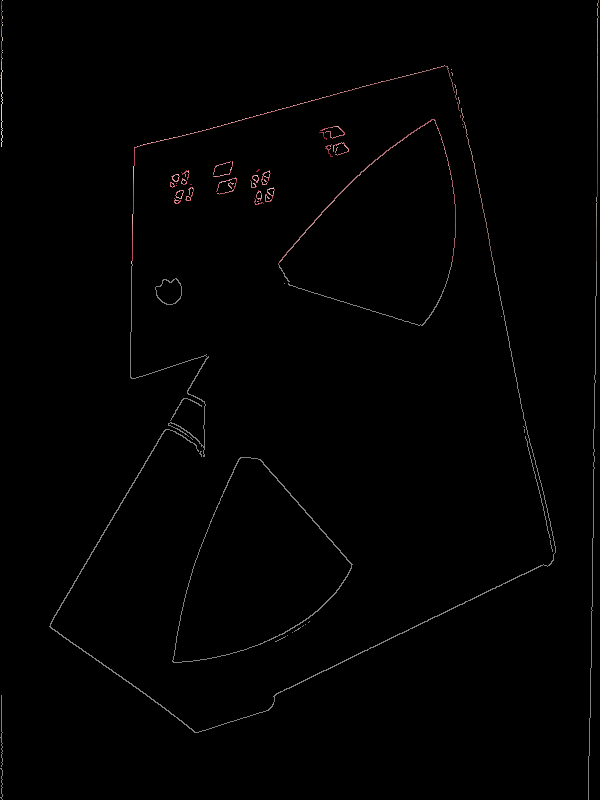

In [24]:
mask = detected_edges != 0
dst = acril * (mask[:, :, None].astype(acril.dtype))

cv2_imshow(detected_edges)

print("RGB image")
cv2_imshow(dst)

### 6. Get contours

In [0]:
contours, hierarchy = cv.findContours(detected_edges, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
drawing = np.zeros((detected_edges.shape[0], detected_edges.shape[1], 3), dtype=np.uint8)
for i in range(len(contours)):
  color = (255, 255, 255)
  cv.drawContours(drawing, contours, i, color, 1, cv.LINE_8, hierarchy, 0)


### 7. Export contours as SVG

In [0]:
w = 500
h = 500
with open("allContours.svg", "w+") as f:
    f.write(f'<svg width="{w}" height="{h}" xmlns="http://www.w3.org/2000/svg">')

    for c in contours:
        f.write('<path d="M')
        for i in range(len(c)):
            x, y = c[i][0]
            f.write(f"{x} {y} ")
        f.write('" style="stroke:pink"/>')
    f.write("</svg>")